In [245]:
from radd import build, fit, vis

## Dir

In [246]:
%cd /home/kyle/Dropbox/ELife/ReV_Cond/

/home/kyle/Dropbox/ELife/ReV_Cond


## Prepare Data/Params

In [276]:
data = redf_store['redata']
binits = {k: v for k,v in redf_store['rebsl_boot_popt'].items()}
binits['ssv']=-abs(binits['ssv'])
pinits = {k: v for k,v in redf_store['repnl_boot_popt'].items()}

# since these were unchanged when fitting the flat model to the mean data
# note, these "init" parameters were optimized on the mean RT and SC
# as part of the initial submission to eLife so they're obviously in the ball park
# and the flat model fit with the new routine had liberal convergence criteria.

# TODO: this is a test. need to fit the flat model with different init parameters
# and with more stringent convergence criteria

inits = {k: np.mean([binits[k], pinits[k]]) for k in binits.keys()}

## optimize

In [248]:
m = build.Model(data=data, inits=inits, fit_on='average', depends_on={'v':'Cond'}, prepare=1)
popt, yhat = m.optimize(xtol=.1e-8, ftol=.1e-8, ntrials=5000, maxfev=5000)

preparing reactive model to fit on average data


In [250]:
yhat

array([[ 0.922027  ,  0.98972479,  0.97557391,  0.83704296,  0.50503596,
         0.08695739,  5.12858731,  5.46171239,  5.64244469,  5.80043007,
         6.0592462 ,  5.00890135,  5.37630303,  5.55544222,  5.7000466 ,
         6.01601423],
       [ 0.92809159,  0.98888531,  0.97649201,  0.89082018,  0.61892472,
         0.19109509,  5.15727563,  5.51219641,  5.71865953,  5.90243999,
         6.14384194,  4.98771993,  5.34285794,  5.55000026,  5.79605229,
         6.08787661]])

##visualize fits

In [254]:
m.y

array([[ 0.9420135 ,  0.9942624 ,  0.98278695,  0.89672148,  0.50491798,
         0.1032787 ,  5.1263442 ,  5.42573977,  5.62966871,  5.82118464,
         6.10313177,  4.97953939,  5.29185534,  5.48165798,  5.67573452,
         5.94282818],
       [ 0.9272458 ,  0.99344265,  0.985246  ,  0.92541009,  0.59426236,
         0.18114755,  5.16524601,  5.49016476,  5.69891739,  5.90304947,
         6.17696142,  4.96908236,  5.29388809,  5.53158092,  5.71655416,
         5.9969182 ]], dtype=float32)

In [271]:
p = inits.copy(); ncond=2; bias = ['v']

In [487]:
wts

array([[ 0.85057508,  0.94201328,  0.85581924,  0.83270821,  0.80039883],
       [ 0.78309863,  0.92151512,  0.92724563,  0.8677305 ,  0.90131412],
       [ 0.10908232,  0.1329466 ,  0.28385246,  0.25557591,  0.25618065]])

In [493]:
data.groupby('Cond').apply(build.rangl_data)['bsl']

array([ 0.94201326,  0.99426228,  0.98278689,  0.8967213 ,  0.50491804,
        0.10327869,  5.05134583,  5.32041454,  5.58484221,  5.85082388,
        6.24409151,  4.91785669,  5.18539333,  5.45045137,  5.58876324,
        5.9842329 ], dtype=float32)

In [498]:
m.dat[:][1]

array([[ 0.99173552,  1.        ,  1.        ,  1.        ,  0.89999998,
         0.        ,  5.25041199,  5.45125628,  5.58501434,  5.7196002 ,
         5.98435068,  5.26764107,  5.45099211,  5.58452368,  5.70915556,
         5.90187311],
       [ 0.96694213,  1.        ,  1.        ,  1.        ,  0.75      ,
         0.34999999,  5.31446838,  5.59965944,  5.85019016,  5.9848609 ,
         6.24977255,  5.31439829,  5.44767141,  5.51706028,  5.75070906,
         5.98038673]], dtype=float32)

In [491]:
m = build.Model(data=data, inits=inits, fit_on='average', depends_on={'v':'Cond'}, prepare=1)
np.array([np.vstack(cset) for cset in m.datdf.unstack().values])

preparing reactive model to fit on average data


array([[[ 0.99173552,  1.        ,  1.        , ...,  5.31869507,
          5.45847368,  5.67435551],
        [ 0.97520661,  1.        ,  1.        , ...,  5.58578682,
          5.71808434,  6.02119255]],

       [[ 0.99173552,  1.        ,  1.        , ...,  5.58452368,
          5.70915556,  5.90187311],
        [ 0.96694213,  1.        ,  1.        , ...,  5.51706028,
          5.75070906,  5.98038673]],

       [[ 0.94214875,  1.        ,  1.        , ...,  5.85349989,
          6.09803867,  6.2075572 ],
        [ 0.86776859,  1.        ,  1.        , ...,  5.71828604,
          5.86901045,  5.98520994]],

       ..., 
       [[ 0.99173552,  1.        ,  1.        , ...,  5.60195398,
          5.85134649,  6.02187443],
        [ 0.93388432,  1.        ,  1.        , ...,  5.85976267,
          6.05565214,  6.24967098]],

       [[ 1.        ,  1.        ,  0.89999998, ...,  5.05077314,
          5.1843133 ,  5.44650364],
        [ 0.97520661,  1.        ,  0.89999998, ...,  5.31748

In [296]:
inits['v0'] = popt['v0']
inits['v1'] = popt['v1']

In [289]:
p['tr'] = np.array([p['tr']]*ncond)

In [332]:
y, yhat = y.reshape(ncond, 16), yhat.reshape(ncond, 16)

In [341]:
wtc, wte = wts.T[:5].T, wts.T[5:].T
wte*y[:, 11:] - wte*yhat[:, 11:]

array([[ 0.08773828,  0.15795705,  0.14348039,  0.05013136,  0.15390228],
       [ 0.26532713,  0.25809657,  0.0702856 ,  0.28949285,  0.31456847]])

In [356]:
y, yhat = y.reshape(ncond, 16), yhat.reshape(ncond, 16)
cost = np.hstack([y[:, :6] - yhat[:, :6], wtc*(y[:, 6:11] - yhat[:, 6:11]), wte*y[:, 11:] - wte*yhat[:, 11:]]).astype(np.float32)

In [469]:
pe*(sde.min()/sde.values)

array([ 0.10908232,  0.1329466 ,  0.28385246,  0.25557591,  0.25618065])

In [465]:
pe

0.28385245901639344

In [464]:
sde.values

array([ 0.49555742,  0.40660352,  0.19043891,  0.21150879,  0.21100951])

In [481]:
wtc

array([[ 0.85057508,  0.94201328,  0.85581924,  0.83270821,  0.80039883],
       [ 0.78309863,  0.92151512,  0.92724563,  0.8677305 ,  0.90131412]])

In [486]:
ncond = 2

sd = m.observed.groupby(m.cond).std()

pc = m.data.query('trial_type=="go"').groupby(m.cond).response.mean().values
pe = m.data.query('trial_type=="stop"').response.mean()

sdc = sd.loc[:,'c5':'c95'].values
sde = sd.loc[:,'e5':'e95'].mean(axis=0)

wtc = (pc*(sdc.min(axis=1)/sdc.T)).T
wte = pe*(sde.min()/sde.values)
#wte =(sde.min(axis=1)/sde.T).T

wts = np.append(wtc, wte).reshape(ncond+1, 5)

In [484]:
wts

array([ 0.85057508,  0.94201328,  0.85581924,  0.83270821,  0.80039883,
        0.78309863,  0.92151512,  0.92724563,  0.8677305 ,  0.90131412,
        0.10908232,  0.1329466 ,  0.28385246,  0.25557591,  0.25618065])

In [478]:
pc*(sdc.flatten().min()/sdc.flatten()).reshape(2,5).T

array([[ 0.76319699,  0.8452419 ,  0.76790242,  0.74716555,  0.71817526],
       [ 0.78309863,  0.92151512,  0.92724563,  0.8677305 ,  0.90131412]])

In [471]:
wtc

array([[ 0.85057508,  0.94201328,  0.85581924,  0.83270821,  0.80039883],
       [ 0.78309863,  0.92151512,  0.92724563,  0.8677305 ,  0.90131412]])

In [436]:
len(serr[serr.Cond=='bsl'].rt)

1852

In [435]:
len(serr[serr.Cond=='pnl'].rt)

1611

In [444]:
serr = m.data.query('trial_type=="go" & acc==1')
from scipy.stats import ttest_rel
x = pd.pivot_table(serr, values='rt', index='idx', columns='Cond').values.T
ttest_rel(x[0], x[1])

(-3.5265067633967706, 0.00081382710194226782)

In [431]:
np.sum(pe)/2

0.28385245901639344

In [411]:
e[0]

array([ 0.76856523,  0.9389982 ,  1.        ,  0.84810571,  0.80219476])

In [372]:
wts

array([[[ 0.90293322,  1.        ,  0.90850019,  0.88396654,  0.84966831],
        [ 0.84454281,  0.99381986,  1.        ,  0.93581514,  0.97203382]],

       [[ 0.76856523,  0.9389982 ,  1.        ,  0.84810571,  0.80219476],
        [ 0.24227354,  0.29502821,  0.9621859 ,  0.92643648,  1.        ]]])

In [361]:
data.groupby(['Cond', 'trial_type', 'response']).count()
pr = data.groupby(['trial_type']).response.count()
pr 

trial_type
go      14762
stop    12200
Name: response, dtype: int64

In [357]:
cost.flatten()

array([-0.0239865 , -0.0047376 , -0.01321305, -0.07427852, -0.01008202,
        0.0082787 ,  0.64621675,  0.71716541,  0.69098043,  0.81526083,
        0.76153576,  0.1037405 ,  0.1691111 ,  0.15380469,  0.0531407 ,
        0.16247624, -0.0037542 , -0.00655735, -0.013754  , -0.03658991,
        0.03126236,  0.00914755,  0.67053771,  0.66375405,  0.66034776,
        0.78072715,  0.77066278,  0.24415164,  0.2693319 ,  0.0756136 ,
        0.32191011,  0.35380164], dtype=float32)

In [327]:
#cst[6:11]*wtc
#cst[11:]*wte
cst[6:11]

array([ 0.75974097,  0.83798701,  0.86329519,  0.85917884,  0.88595345])

In [349]:
np.hstack([i[ii] for i in [yh[0], yh[1], yh[2]*wtc, yh[3]] for ii in range(ncond)])

IndexError: invalid index to scalar variable.

In [314]:
sum([yh[0], yh[1], yh[2]*wtc, 
     yh[3]*wte

ValueError: operands could not be broadcast together with shapes (2,) (2,5) 

In [538]:
y

array([[ 0.9420135 ,  0.9942624 ,  0.98278695,  0.89672148,  0.50491798,
         0.1032787 ,  5.1263442 ,  5.42573977,  5.62966871,  5.82118464,
         6.10313177,  4.97953939,  5.29185534,  5.48165798,  5.67573452,
         5.94282818],
       [ 0.9272458 ,  0.99344265,  0.985246  ,  0.92541009,  0.59426236,
         0.18114755,  5.16524601,  5.49016476,  5.69891739,  5.90304947,
         6.17696142,  4.96908236,  5.29388809,  5.53158092,  5.71655416,
         5.9969182 ]], dtype=float32)

In [353]:
yhat =  fit.recost(inits, m.y, wts=m.wts, ncond=2)
y=m.y

In [278]:
inits['v'] = np.array([1.111, 1.065])

In [516]:
a, tr, v0, v1, ssv, z = popt['a'], popt['tr'], popt['v0'], popt['v1'], popt['ssv'], popt['z']

In [517]:
v=np.array([v0, v1])

In [546]:
yhat = fit.simulate_full(a, tr, v, ssv, z, ncond=2, )

In [552]:
yhat=yhat.reshape(2,16)
cost = np.hstack([y[:, :6] - yhat[:, :6], wtc*y[:, 6:11] - wtc*yhat[:, 6:11], wte*y[:, 11:] - wte*yhat[:, 11:]]).astype(np.float32)


In [555]:
yhat

array([[ 0.964     ,  0.994     ,  0.989     ,  0.951     ,  0.51      ,
         0.102     ,  5.11190698,  5.38370698,  5.58370698,  5.81370698,
         6.12370698,  4.87370698,  5.06370698,  5.19370698,  5.33910698,
         5.61530698],
       [ 0.933     ,  0.997     ,  0.99      ,  0.962     ,  0.585     ,
         0.176     ,  5.18370698,  5.46370698,  5.67370698,  5.89010698,
         6.19650698,  4.90850698,  5.11370698,  5.25370698,  5.40370698,
         5.65010698]])

In [554]:
yhat = y+cost

array([[ 0.92002702,  0.99452478,  0.97657388,  0.84244299,  0.49983597,
         0.10455739,  5.13862419,  5.46533537,  5.66900349,  5.82741117,
         6.08666325,  4.99108362,  5.32218695,  5.56339359,  5.76176834,
         6.02673292],
       [ 0.92149156,  0.98988533,  0.980492  ,  0.88882017,  0.60352474,
         0.18629509,  5.15078926,  5.51454592,  5.72229385,  5.91427994,
         6.15934467,  4.97568989,  5.31784248,  5.61045599,  5.79651022,
         6.08576441]], dtype=float32)

In [548]:
cost = np.array([y[:, :6] - yhat[:, :6], wtc*y[:, 6:11] - wtc*yhat[:, 6:11], wte*y[:, 11:] - wte*yhat[:, 11:]]).astype(np.float32)

array([[ 0.9420135 ,  0.9942624 ,  0.98278695,  0.89672148,  0.50491798,
         0.1032787 ,  5.1263442 ,  5.42573977,  5.62966871,  5.82118464,
         6.10313177,  4.97953939,  5.29185534,  5.48165798,  5.67573452,
         5.94282818],
       [ 0.9272458 ,  0.99344265,  0.985246  ,  0.92541009,  0.59426236,
         0.18114755,  5.16524601,  5.49016476,  5.69891739,  5.90304947,
         6.17696142,  4.96908236,  5.29388809,  5.53158092,  5.71655416,
         5.9969182 ]], dtype=float32)

In [507]:
yhat = yh.reshape(2,16)

In [274]:
if 'tr' not in bias:
      p['tr'] = np.array([p['tr']]*ncond)

p['v0'] = 1.1117057600158933
p['v1'] = 1.0650061340336903
p['v'] = np.array([p['v0'], p['v1']])
a, tr, v, ssv, z = p['a'], p['tr'], p['v'], -abs(p['ssv']),  p['z']

yhat = fit.simulate_full(a, tr, v, ssv, z, wts=m.wts, ncond=2)


ValueError: operands could not be broadcast together with shapes (5,) (2,) 

In [502]:
y = m.y


wtc, wte = wts.T[:5].T, wts.T[5:].T
ycost = np.hstack(np.hstack([y[:, :6], wtc*y[:, 6:11], wte*y[:, 11:]])).astype(np.float32)
yhcost = np.hstack(np.hstack([yhat[:, :6], wtc*yhat[:, 6:11], wte*yhat[:, 11:]])).astype(np.float32)

AttributeError: 'Model' object has no attribute 'y'

In [264]:
ycost - yhcost

array([ 0.01998651,  0.00453758,  0.00721306,  0.05967849, -0.00011796,
        0.0163213 , -0.00190783, -0.03078604, -0.01022577,  0.01912594,
        0.03808069, -0.00685132, -0.02563882, -0.0179702 , -0.00189433,
       -0.01790655, -0.00084579,  0.00455737,  0.00875401,  0.03458989,
       -0.02466238, -0.00994754,  0.00750828, -0.01834583, -0.01546001,
        0.00056553,  0.02985096, -0.0053134 , -0.01260924, -0.00117853,
       -0.02020144, -0.02402198], dtype=float32)

In [545]:
yhat

array([ 0.953     ,  0.998     ,  0.984     ,  0.95      ,  0.532     ,
        0.121     ,  5.12370698,  5.38370698,  5.57370698,  5.82370698,
        6.15370698,  4.88790698,  5.08830698,  5.20870698,  5.40370698,
        5.70370698,  0.925     ,  0.997     ,  0.987     ,  0.957     ,
        0.566     ,  0.147     ,  5.16370698,  5.49330698,  5.69370698,
        5.91370698,  6.22450698,  4.94370698,  5.11490698,  5.25370698,
        5.43310698,  5.69650698])

In [499]:
from copy import deepcopy
ic = deepcopy(inits)
ic['tr']=np.array([inits['tr']]*2)

In [501]:
inits

{'a': 0.44409409206000017,
 'ssv': -0.94733930097466645,
 'tr': 0.30487069814466666,
 'v': array([ 1.111,  1.065]),
 'v0': 1.1117057600158933,
 'v1': 1.0650061340336903,
 'z': 0.15424655482600008}

In [541]:
yhat.reshape(2,16)

array([ 0.953     ,  0.998     ,  0.984     ,  0.95      ,  0.532     ,
        0.121     ,  5.12370698,  5.38370698,  5.57370698,  5.82370698,
        6.15370698,  4.88790698,  5.08830698,  5.20870698,  5.40370698,
        5.70370698,  0.925     ,  0.997     ,  0.987     ,  0.957     ,
        0.566     ,  0.147     ,  5.16370698,  5.49330698,  5.69370698,
        5.91370698,  6.22450698,  4.94370698,  5.11490698,  5.25370698,
        5.43310698,  5.69650698])

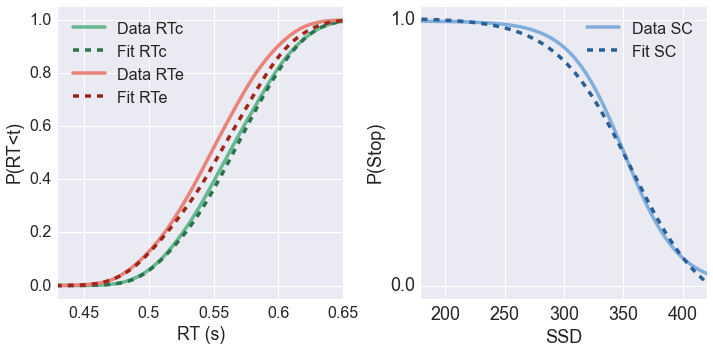

In [557]:
yhat = y+cost
vis.plot_fits(y[0], yhat[0], bw=.2, plot_acc=True, save=False, savestr='Re_Vbsl_qp')

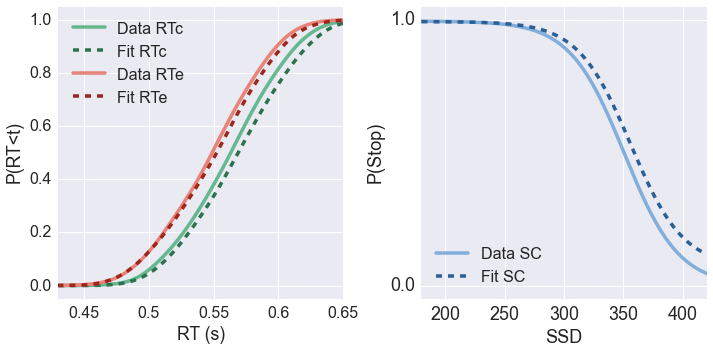

In [560]:
yhat = y+cost
vis.plot_fits(y[0], y[1], bw=.2, plot_acc=True, save=False, savestr='Re_Data_qp')

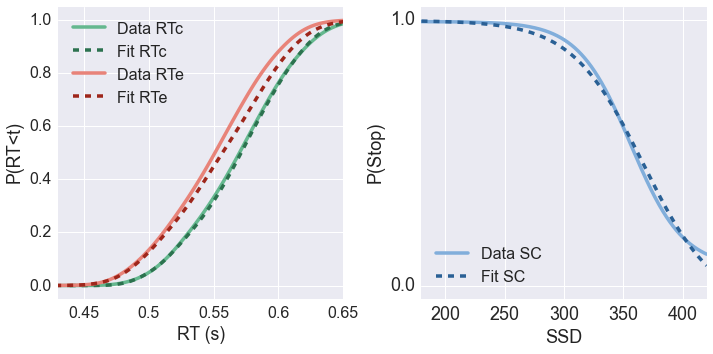

In [559]:
vis.plot_fits(y[1], yhat[1], bw=.2, plot_acc=True, save=True, savestr='Re_Vpnl_qp')